In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
solar_data = pd.read_excel("C:/Users/work/pypsa_thesis/data/electrical/wind_solar_profile/solar_profile_2019.xlsx")
wind_data = pd.read_excel("C:/Users/work/pypsa_thesis/data/electrical/wind_solar_profile/wind_profile_2019.xlsx")

solar_profile = []
wind_profile = []
i_count = 0

for i in range(1, 8761):
    if i % 24 == 0:
        if i == 8761:
            i = 8760
        solar_profile.append(round(solar_data['DE'].iloc[i_count:i].sum() / 24, 5))
        wind_profile.append(round(wind_data['DE'].iloc[i_count:i].sum() / 24, 5))
        i_count = i

In [3]:
years = '2030'
freq = '24'
snapshots = pd.DatetimeIndex([])
period = pd.date_range(start='{}-01-01 00:00'.format(years),
                       freq='{}H'.format(freq),
                       periods=8760 / float(freq))
snapshots = snapshots.append(period)

In [4]:
snapshots_solar = pd.DataFrame(index=snapshots)
snapshots_solar['solar_profile'] = solar_profile
snapshots_solar

,solar_profile
2030-01-01,0.00886
2030-01-02,0.02727
2030-01-03,0.01973
2030-01-04,0.00838
2030-01-05,0.00596
...,...
2030-12-27,0.01728
2030-12-28,0.02989
2030-12-29,0.04530
2030-12-30,0.04391


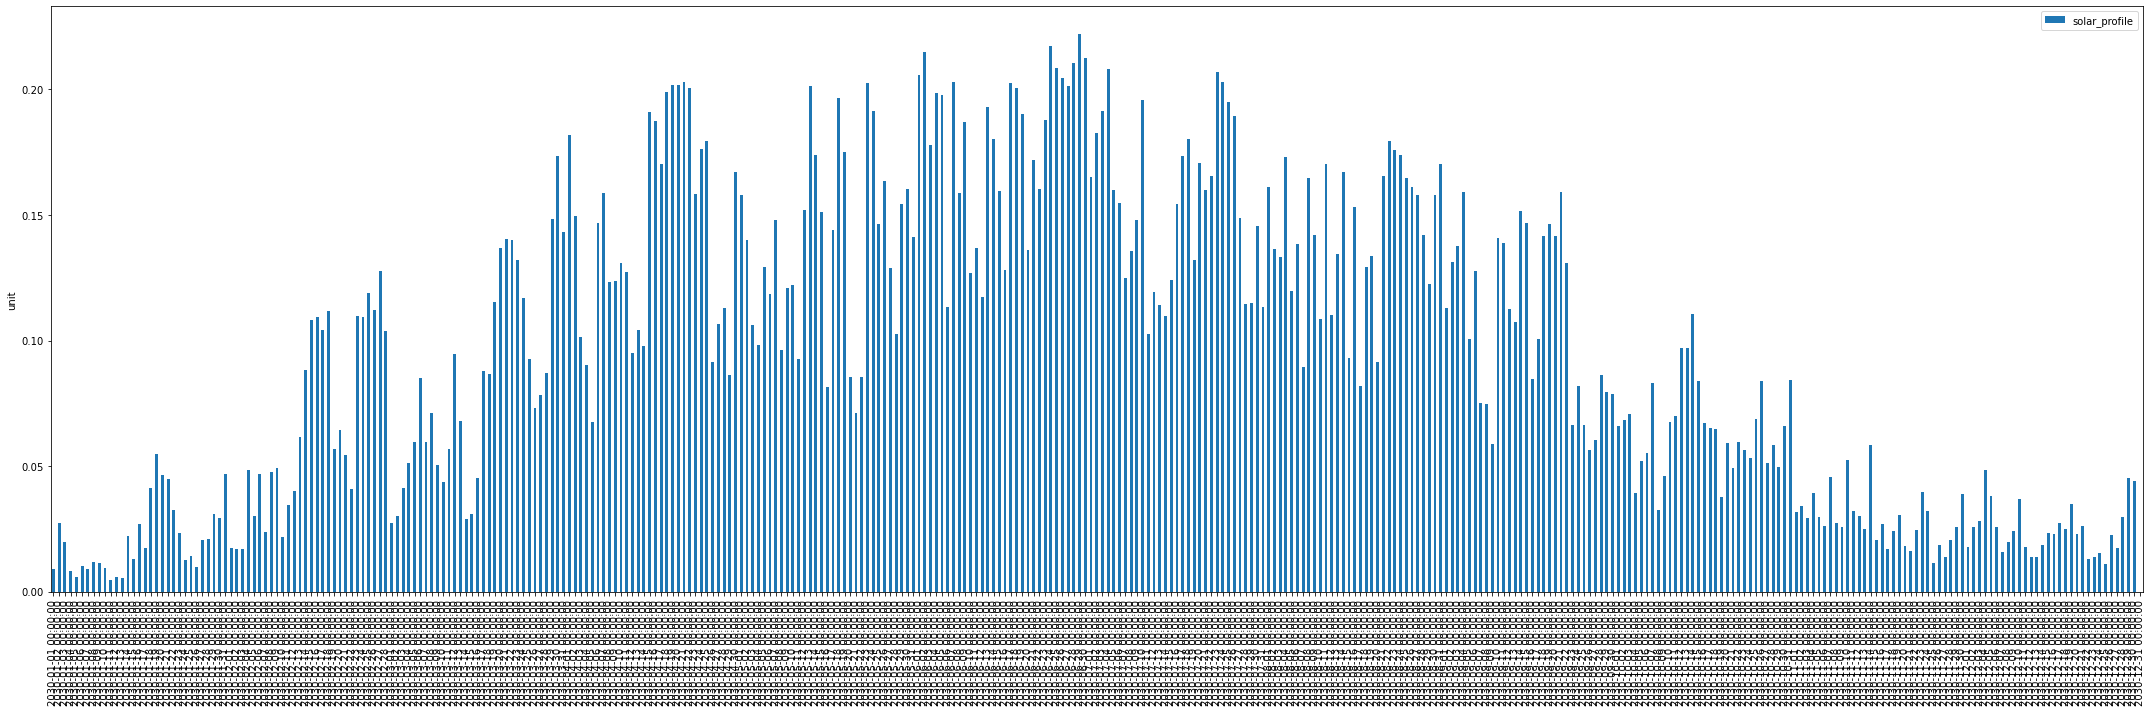

In [5]:
snapshots_solar.plot.bar(ylabel='unit', figsize=(30,10))
plt.tight_layout()

In [6]:
snapshots_wind = pd.DataFrame(index=snapshots)
snapshots_wind['wind_profile'] = wind_profile
snapshots_wind

,wind_profile
2030-01-01,0.67750
2030-01-02,0.59952
2030-01-03,0.22566
2030-01-04,0.40130
2030-01-05,0.50368
...,...
2030-12-27,0.10025
2030-12-28,0.07955
2030-12-29,0.19510
2030-12-30,0.48303


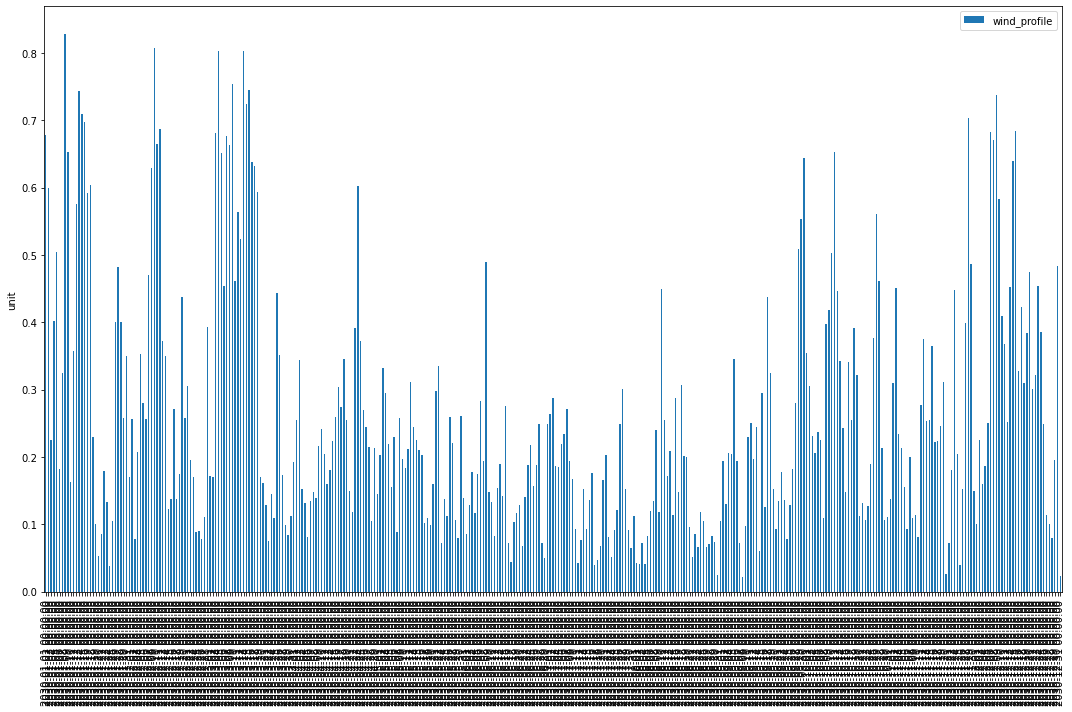

In [7]:
snapshots_wind.plot.bar(ylabel='unit', figsize=(15,10))
plt.tight_layout()

In [13]:
ac_data = pd.read_excel("C:/Users/work/pypsa_thesis/data/electrical/ac_profile/ac_gen_20210101_20211231_transnetBW.xlsx")
date_time_list = ac_data['Date'] + ' ' + ac_data['Time of day']
ac_data.insert(0, 'timestamp', date_time_list)
ac_data['timestamp'] = pd.to_datetime(ac_data['timestamp'])
ac_data.drop(['Date', 'Time of day'], axis=1, inplace=True)
ac_data = ac_data.set_index(pd.to_datetime(ac_data['timestamp']))
ac_data_daily = ac_data.resample('D').mean()

for col in list(ac_data_daily.columns):
    ac_data_daily[col] = ac_data_daily[col].div(24)  # MWh to MW


In [16]:
ac_data_solar = ac_data_daily['SOL']
ac_data_solar.where(lambda df: df<=1., other=1.)

timestamp
2021-01-01    1.000000
2021-01-02    0.692274
2021-01-03    0.394531
2021-01-04    0.327691
2021-01-05    0.286458
                ...   
2021-12-27    1.000000
2021-12-28    0.889757
2021-12-29    0.919705
2021-12-30    1.000000
2021-12-31    1.000000
Freq: D, Name: SOL, Length: 365, dtype: float64

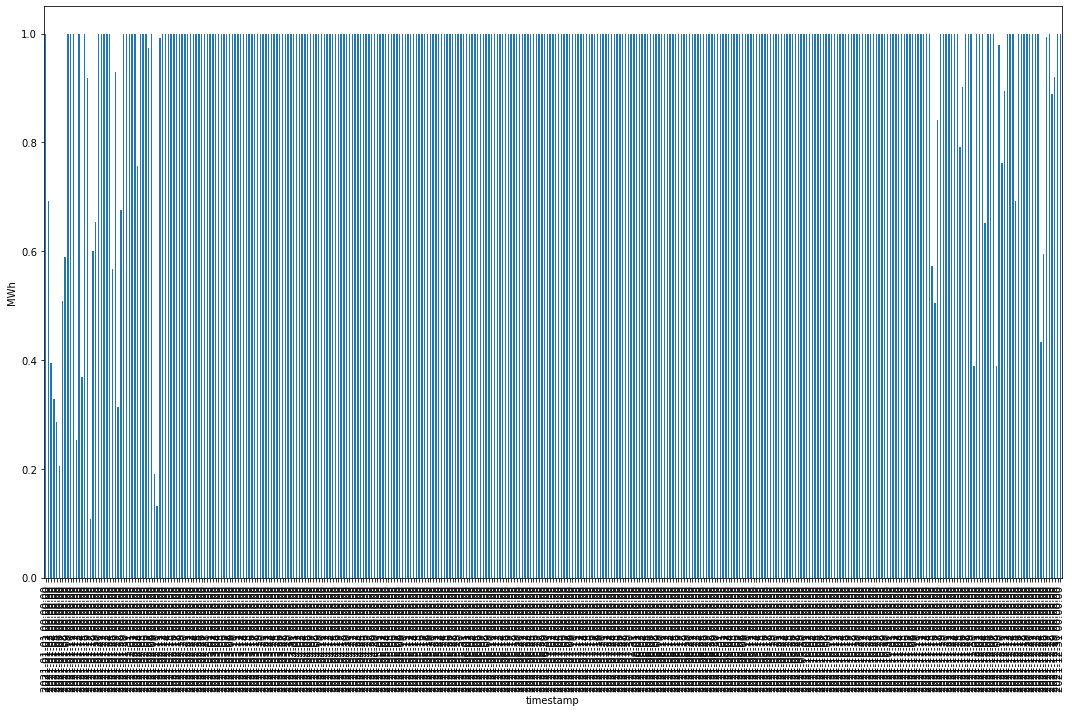

In [17]:
ac_data_solar.where(lambda df: df<=1., other=1.).plot.bar(ylabel='MWh', figsize=(15,10))
plt.tight_layout()

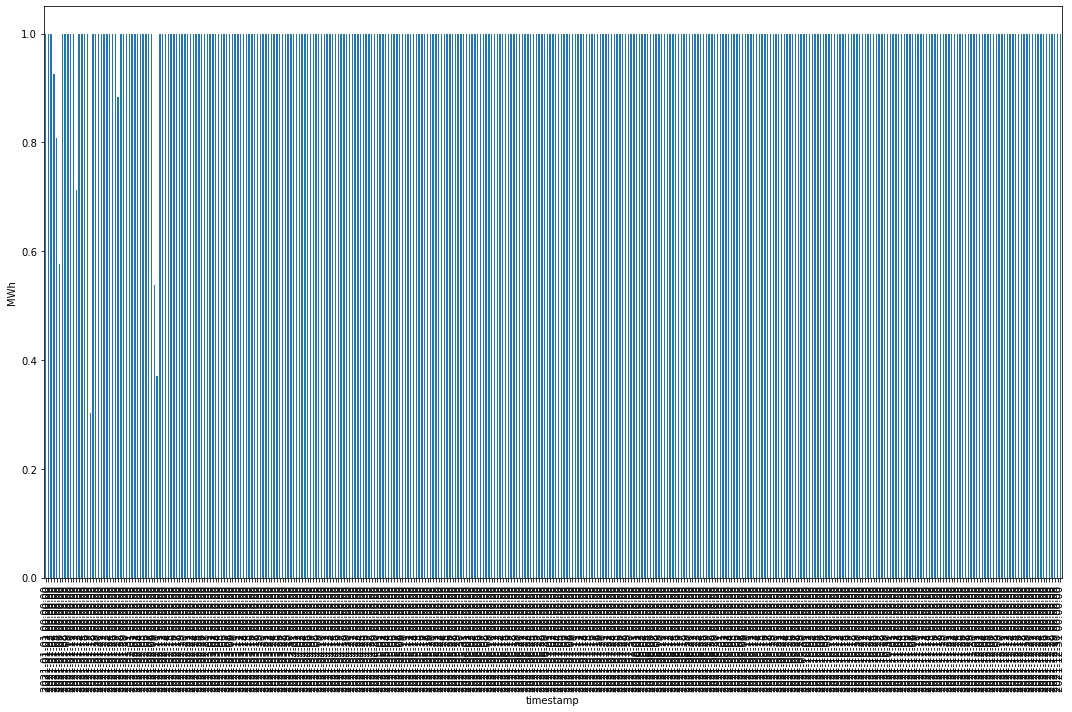

In [12]:
ac_data_daily['SOL'].div(34).where(lambda df: df<=1., other=1.).plot.bar(ylabel='MWh', figsize=(15,10))
plt.tight_layout()

In [36]:
solar_data = pd.read_excel("C:/Users/work/pypsa_thesis/data/electrical/wind_solar_profile/solar_profile_2019.xlsx")

In [37]:
solar_data.set_index('start', inplace=True)

In [38]:
solar_profile_daily = solar_data.resample('D').mean().where(lambda df: df <= 1., other=1.)

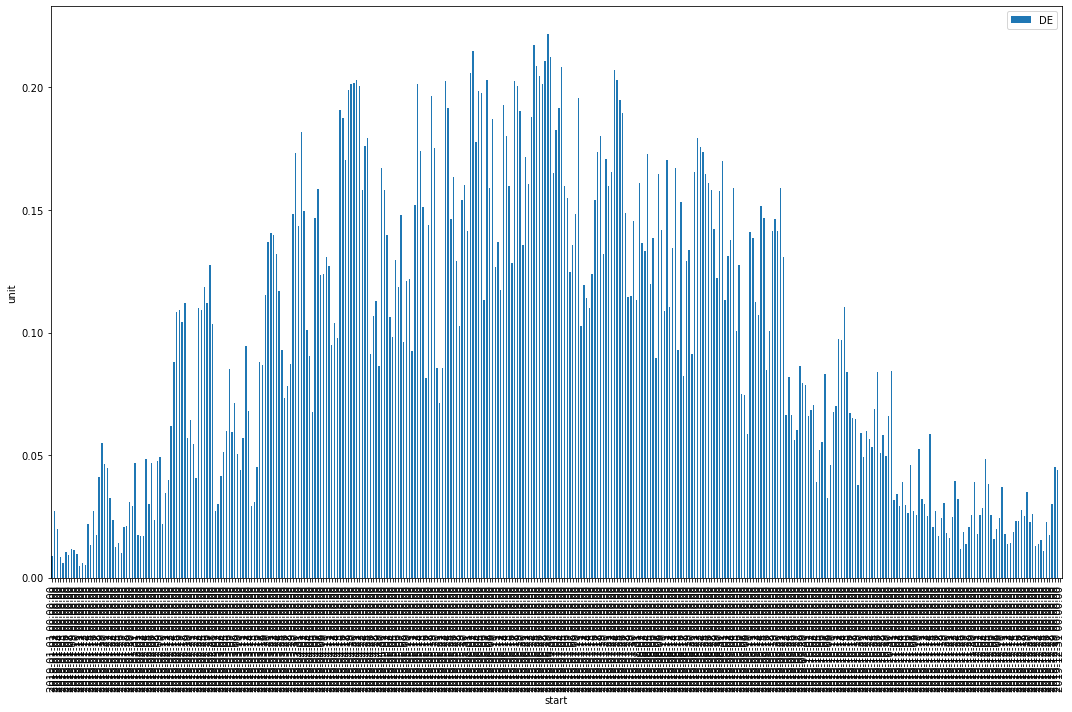

In [39]:
solar_profile_daily.plot.bar(ylabel='unit', figsize=(15,10))
plt.tight_layout()

In [40]:
wind_data = pd.read_excel("C:/Users/work/pypsa_thesis/data/electrical/wind_solar_profile/wind_profile_2019.xlsx")
wind_data.set_index('start', inplace=True)
wind_data_daily = wind_data.resample('D').mean().where(lambda df: df <= 1., other=1.)


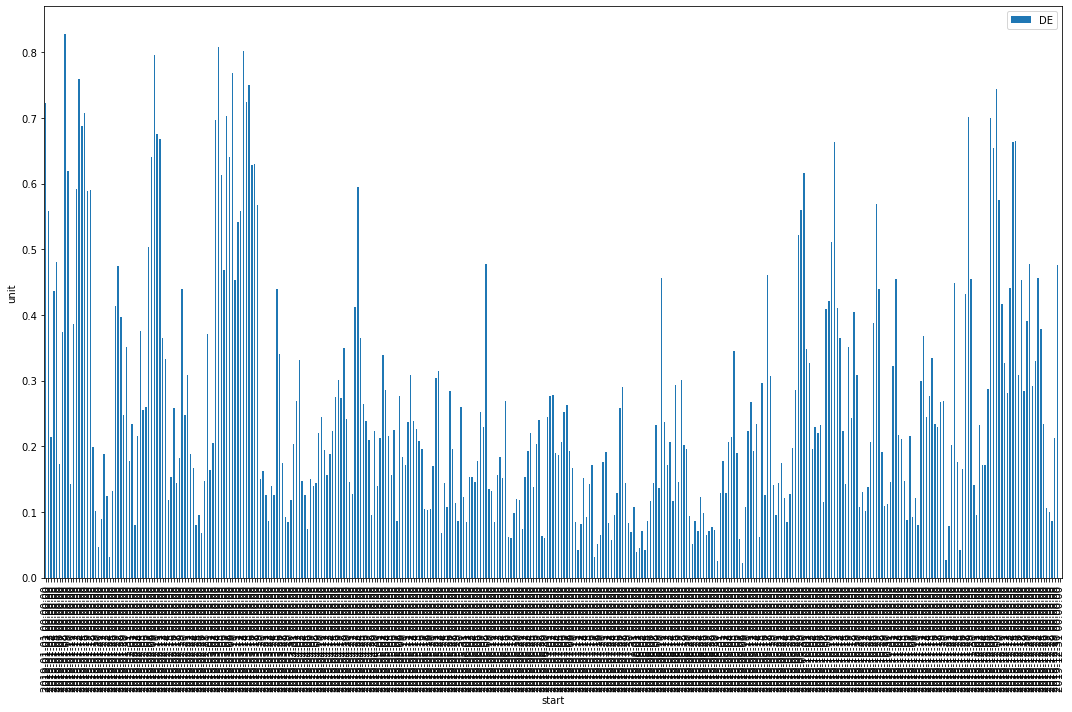

In [41]:
wind_data_daily.plot.bar(ylabel='unit', figsize=(15,10))
plt.tight_layout()